In [73]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler  

## Functions

In [74]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Loading Dataset

In [75]:
digits = datasets.load_digits()

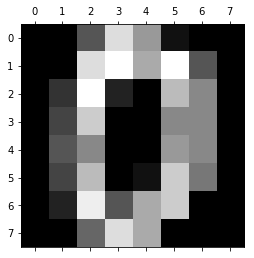

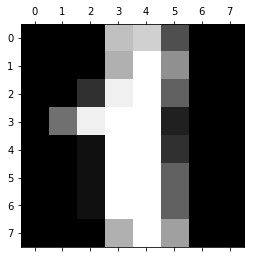

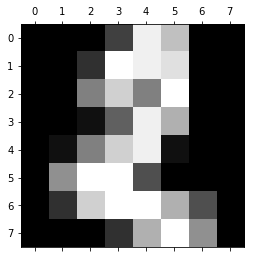

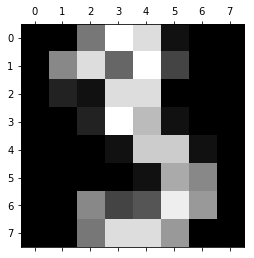

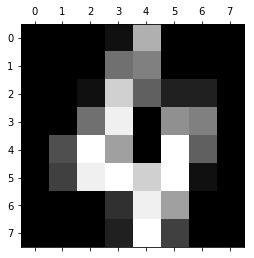

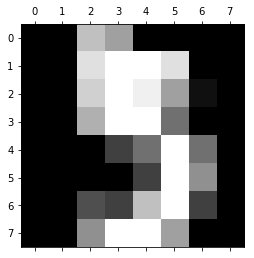

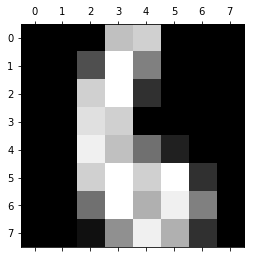

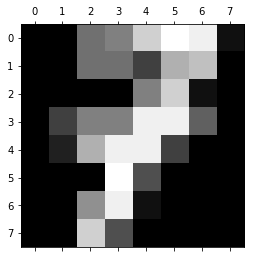

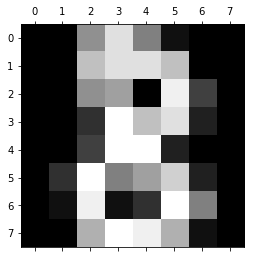

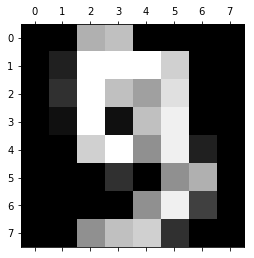

In [76]:
plt.gray()

for i in range(10):
    plt.matshow(digits.images[i]) 
    
plt.show() 

## Training and Predicting

In [86]:
#spliting the dataset in train and test
n_samples = len(digits.images)
digits.images = data = digits.images.reshape((n_samples, -1))
X_train, X_test, y_train, y_test = train_test_split(digits.images, digits.target, test_size=0.3)

#preprocessing data
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)

#building the classifier
classifier = MLPClassifier()

#training the neural network
classifier.fit(X_train, y_train)

#predicting
X_test = scaler.transform(X_test)
y_pred = classifier.predict(X_test)

## Metrics

### Confusion matrix

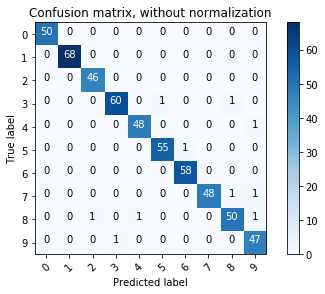

In [87]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = digits.target_names
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

### Accuracy

In [88]:
print('Accuracy score: %s ' % accuracy_score(y_test, y_pred))

Accuracy score: 0.981481481481 


### Macro-f1

In [71]:
target_names = ['class ' + str(name) for name in digits.target_names]
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       1.00      0.98      0.99        43
    class 1       0.98      0.98      0.98        66
    class 2       0.96      1.00      0.98        45
    class 3       1.00      0.94      0.97        54
    class 4       0.98      1.00      0.99        49
    class 5       0.98      0.97      0.98        62
    class 6       0.96      0.98      0.97        53
    class 7       0.95      1.00      0.97        55
    class 8       0.96      0.96      0.96        57
    class 9       0.96      0.93      0.95        56

avg / total       0.97      0.97      0.97       540

